In [1]:
%load_ext autoreload
%autoreload 2

In [49]:
import numpy as np
import scipy
import pickle
import pdb
import pandas as pd
import os, sys
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [9]:
sys.path.append('/home/akumar/nse/neural_control')
from loaders import load_sabes
from decoders import lr_decoder
from utils import calc_loadings, apply_df_filters

In [53]:
sys.path.append('/home/akumar/nse/neural_control/analysis_scripts')
from su_figs import get_scalar

In [5]:
with open('/home/akumar/nse/neural_control/data/indy_decoding_df.dat', 'rb') as f:
    sabes_df = pickle.load(f)
sabes_df = pd.DataFrame(sabes_df)

In [11]:
decoder_params = {'trainlag': 4, 'testlag': 4, 'decoding_window': 5}

In [24]:
# For each method within DCA, FCCA, and PCA, sequentially remove all neurons and measure the delta r^2 in decoding
data_files = np.unique(sabes_df['data_file'].values)
dims = np.array([6, 10, 15])

baseline_r2 = np.zeros((len(data_files), 5, dims.size, 3))
delta_r2 = np.zeros((len(data_files), 5, dims.size, 3), dtype=np.object)

kfold = KFold(n_splits=5)

for i, data_file in tqdm(enumerate(data_files)):
    dat = load_sabes('/mnt/Secondary/data/sabes/%s' % data_file)
    X = np.squeeze(dat['spike_rates'])
    Z = dat['behavior']
    for fold_idx, (train_idxs, test_idxs) in enumerate(kfold.split(X)):

        xtrain = X[train_idxs]
        xtest = X[test_idxs]

        ztrain = Z[train_idxs]
        ztest = Z[test_idxs]

        for dr_idx, dimreduc_method in enumerate(['DCA', 'LQGCA', 'PCA']):
            for didx, d in enumerate(dims):
                df_ = apply_df_filters(sabes_df, data_file=data_file, fold_idx=fold_idx, dim=d, dimreduc_method=dimreduc_method)
                if dimreduc_method == 'LQGCA':
                    df_ = apply_df_filters(df_, dimreduc_args={'T': 3, 'loss_type': 'trace', 'n_init': 5})
                V = df_.iloc[0]['coef']
                if dimreduc_method == 'PCA':
                    V = V[:, 0:d]

                # Get a baseline r2
                xtrain_proj = xtrain @ V 
                xtest_proj = xtest @ V

                _, r2, _, decodingregressor = lr_decoder(xtest_proj, xtrain_proj, ztest, ztrain, **decoder_params)
                baseline_r2[i, fold_idx, didx, dr_idx] = r2

                # Now, sequentially remove the row corresponding to each neuron and measure the delta
                ablated_r2 = np.zeros(X.shape[-1])
                for neu_idx in range(X.shape[-1]):
                    idxs = list(np.arange(X.shape[-1]))
                    del idxs[neu_idx]


                    xtrain_proj = xtrain[:, idxs] @ V[idxs, :]
                    xtest_proj = xtest[:, idxs] @ V[idxs, :]

                    _, r2, _, decodingregressor = lr_decoder(xtest_proj, xtrain_proj, ztest, ztrain, **decoder_params)
                    ablated_r2[neu_idx] = r2
                delta_r2[i, fold_idx, didx, dr_idx] = ablated_r2


/home/akumar/anaconda3/envs/dyn/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
0it [00:00, ?it/s]

Processing spikes


100%|██████████| 1/1 [00:14<00:00, 14.76s/it]
1it [06:11, 371.55s/it]

Processing spikes


100%|██████████| 1/1 [00:20<00:00, 20.80s/it]
2it [13:43, 418.90s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.09s/it]
3it [14:58, 261.74s/it]

Processing spikes


100%|██████████| 1/1 [00:28<00:00, 28.32s/it]
4it [25:23, 405.29s/it]

Processing spikes


100%|██████████| 1/1 [00:12<00:00, 12.20s/it]
5it [27:27, 303.96s/it]

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.20s/it]
6it [28:16, 216.96s/it]

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.09s/it]
7it [29:03, 161.48s/it]

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.82s/it]
8it [30:06, 130.11s/it]

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.32s/it]
9it [30:59, 106.07s/it]

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.06s/it]
10it [31:41, 86.38s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.14s/it]
11it [32:49, 80.82s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.07s/it]
12it [33:54, 75.97s/it]

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.62s/it]
13it [35:28, 81.28s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.26s/it]
14it [36:32, 76.04s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.35s/it]
15it [37:48, 76.07s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.26s/it]
16it [38:48, 71.16s/it]

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.91s/it]
17it [39:43, 66.51s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.16s/it]
18it [40:54, 67.69s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.15s/it]
19it [41:54, 65.55s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.80s/it]
20it [43:15, 70.04s/it]

Processing spikes


100%|██████████| 1/1 [00:06<00:00,  6.14s/it]
21it [44:45, 76.05s/it]

Processing spikes


100%|██████████| 1/1 [00:03<00:00,  3.68s/it]
22it [45:39, 69.60s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.55s/it]
23it [46:42, 67.63s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.71s/it]
24it [47:40, 64.71s/it]

Processing spikes


100%|██████████| 1/1 [00:05<00:00,  5.05s/it]
25it [48:48, 65.59s/it]

Processing spikes


100%|██████████| 1/1 [00:04<00:00,  4.84s/it]
26it [50:04, 68.56s/it]

Processing spikes


100%|██████████| 1/1 [00:06<00:00,  6.07s/it]
27it [51:48, 79.20s/it]

Processing spikes


100%|██████████| 1/1 [00:06<00:00,  6.75s/it]
28it [53:47, 115.28s/it]


In [26]:
# Make into a neatly catalogued dataframe
rl = []
for i, data_file in enumerate(data_files):
    for fold_idx in range(5):
        for dr_idx, dimreduc_method in enumerate(['DCA', 'LQGCA', 'PCA']):
            for didx, d in enumerate(dims):
                result = {}
                result['data_file'] = data_file
                result['fold_idx'] = fold_idx
                result['dimreduc_method'] = dimreduc_method
                result['dim'] = d
                result['baseline_r2'] = baseline_r2[i, fold_idx, didx, dr_idx]
                result['delta_r2'] = delta_r2[i, fold_idx, didx, dr_idx]
                rl.append(result)



In [27]:
with open('/home/akumar/nse/neural_control/data/decoder_ablation.dat', 'wb') as f:
    f.write(pickle.dumps(rl))

In [29]:
ablation_df = pd.DataFrame(rl)

In [28]:
# Plot the correlation between the single unit perturbation and single unit loadings for each method
DIM = 6

# Try the raw leverage scores instead
loadings_l = []
data_files = np.unique(sabes_df['data_file'].values)
for i, data_file in tqdm(enumerate(data_files)):
    loadings = []
    for dimreduc_method in ['DCA', 'LQGCA', 'PCA']:
        loadings_fold = []
        for fold_idx in range(5):            
            df_ = apply_df_filters(sabes_df, data_file=data_file, fold_idx=fold_idx, dim=DIM, dimreduc_method=dimreduc_method)
            if dimreduc_method == 'LQGCA':
                df_ = apply_df_filters(df_, dimreduc_args={'T': 3, 'loss_type': 'trace', 'n_init': 5})
            V = df_.iloc[0]['coef']
            if dimreduc_method == 'PCA':
                V = V[:, 0:DIM]        
            loadings_fold.append(calc_loadings(V))


        # Average loadings across folds
        loadings.append(np.mean(np.array(loadings_fold), axis=0))

    for j in range(loadings[0].size):
        d_ = {}
        d_['data_file'] = data_file
        d_['DCA_loadings'] = loadings[0][j]
        d_['FCCA_loadings'] = loadings[1][j]
        d_['PCA_loadings'] = loadings[2][j]
        d_['nidx'] = j
        loadings_l.append(d_)                

    loadings_df = pd.DataFrame(loadings_l)

28it [00:04,  6.21it/s]


In [32]:
df1 = apply_df_filters(loadings_df, data_file=data_file)

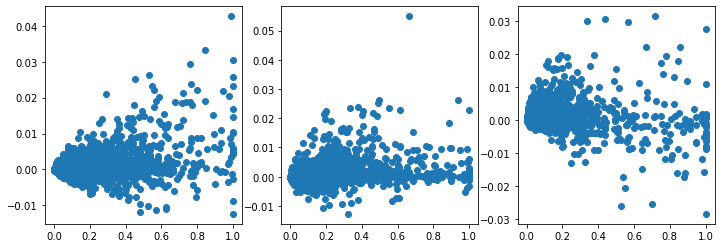

In [46]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

x1 = []
x2 = []
for i, data_file in enumerate(data_files):
    df1 = apply_df_filters(loadings_df, data_file=data_file)
    x1.extend(df1['FCCA_loadings'].values)

    x2_fold = []

    for fold_idx in range(5):
        df2 = apply_df_filters(ablation_df, data_file=data_file, fold_idx=fold_idx, dim=DIM, dimreduc_method='LQGCA')
        x2_fold.append(df2.iloc[0]['baseline_r2'] - df2.iloc[0]['delta_r2'])
        
    x2_fold = np.array(x2_fold)
    x2.extend(np.mean(x2_fold, axis=0))

ax[0].scatter(x1, x2)

x1 = []
x2 = []
for i, data_file in enumerate(data_files):
    df1 = apply_df_filters(loadings_df, data_file=data_file)
    x1.extend(df1['DCA_loadings'].values)

    x2_fold = []

    for fold_idx in range(5):
        df2 = apply_df_filters(ablation_df, data_file=data_file, fold_idx=fold_idx, dim=DIM, dimreduc_method='DCA')
        x2_fold.append(df2.iloc[0]['baseline_r2'] - df2.iloc[0]['delta_r2'])
        
    x2_fold = np.array(x2_fold)
    x2.extend(np.mean(x2_fold, axis=0))
ax[1].scatter(x1, x2)

x1 = []
x2 = []
for i, data_file in enumerate(data_files):
    df1 = apply_df_filters(loadings_df, data_file=data_file)
    x1.extend(df1['PCA_loadings'].values)

    x2_fold = []

    for fold_idx in range(5):
        df2 = apply_df_filters(ablation_df, data_file=data_file, fold_idx=fold_idx, dim=DIM, dimreduc_method='PCA')
        x2_fold.append(df2.iloc[0]['baseline_r2'] - df2.iloc[0]['delta_r2'])
        
    x2_fold = np.array(x2_fold)
    x2.extend(np.mean(x2_fold, axis=0))
ax[2].scatter(x1, x2)



In [54]:
# Get decoding weights
with open('/home/akumar/nse/neural_control/data/sabes_su_df_dw5.dat', 'rb') as f:
    sabes_su_l = pickle.load(f)

sabes_su_df = pd.DataFrame(sabes_su_l)

# Dimensionality selection
itrim_df = loadings_df
data_files = np.unique(itrim_df['data_file'].values)

# Collect the desired single unit statistics into an array with the same ordering as those present in the loadings df
stats = ['decoding_weights']

carray = []
for i, data_file in enumerate(data_files):
    df = apply_df_filters(itrim_df, data_file=data_file)
    carray_ = np.zeros((df.shape[0], len(stats)))
    for j in range(df.shape[0]):                    # Find the correlation between 
        for k, stat in enumerate(stats):
            # Grab the unique identifiers needed
            nidx = df.iloc[j]['nidx']
            if stat == 'orientation_tuning':
                df_ = apply_df_filters(odf, file=data_file, tau=4)
            else:
                df_ = apply_df_filters(sabes_su_df, data_file=data_file)
            carray_[j, k] = get_scalar(df_, stat, nidx)
    carray.append(carray_)


In [94]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

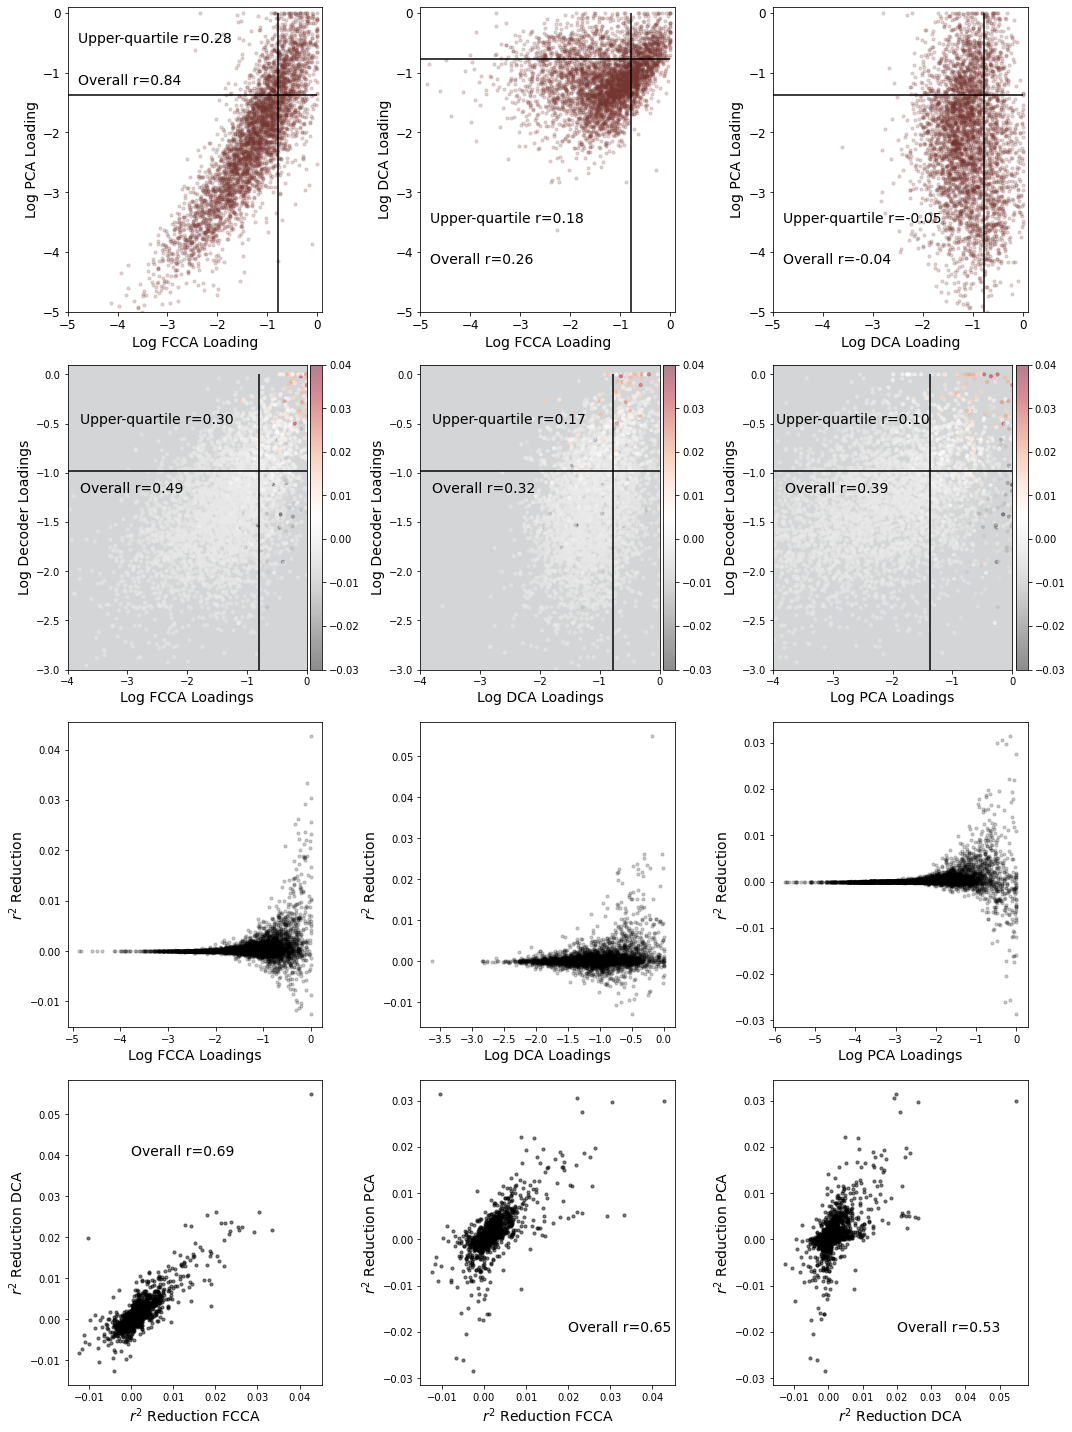

In [97]:
# Produce a 3 x 3 plot that is the pairwise scatters of the methods against each other (row 1)
# Scatters of methods vs decoding weights, colored by the delta r^2 induced by that neuron (row 2)
# Scatters of the delta r^2 vs method weight
fig, ax = plt.subplots(4, 3, figsize=(15, 20))

#df_ = apply_df_filters(loadings_df, dim=6)
df_ = loadings_df

x1 = df_['FCCA_loadings'].values
x2 = df_['PCA_loadings'].values

#x1idxs = np.arange(x1.size)[x1 > np.quantile(x1, 0.75)]
q1_pca = np.quantile(x2, 0.75)
q1_fca = np.quantile(x1, 0.75)


a = ax[0, 0]
# Plot vertical lines at the PCA quantile
a.hlines(np.log10(q1_pca), -5, 0, color='k')
a.vlines(np.log10(q1_fca), -5, 0, color='k')

#x1 = x1[x1idxs]
#x2 = x2[x1idxs]
#x1 = x1[x1 > np.quantile(x1, 0.05)]
#x2 = x2[x2 > np.quantile(x2, 0.05)]

a.scatter(np.log10(x1), np.log10(x2), alpha=0.2, color='#753530', s=10)

a.set_xlim([-5, 0.1])
a.set_ylim([-5, 0.1])
a.set_xlabel('Log FCCA Loading', fontsize=14)
a.set_ylabel('Log PCA Loading', fontsize=14)
a.tick_params(axis='both', labelsize=12)

# Annotate with the spearman-r
r = scipy.stats.spearmanr(x1, x2)[0]

# What is the spearman correlation in the intersection of the upper quartiles?
idxs1 = np.argwhere(x1 > q1_fca)[:, 0]
idxs2 = np.argwhere(x2 > q1_pca)[:, 0]
intersct = np.array(list(set(idxs1).intersection(set(idxs2))))

r2 = scipy.stats.spearmanr(x1[intersct], x2[intersct])[0]
a.annotate('Overall r=%.2f' % r, (-4.8, -1.2), fontsize=14)
a.annotate('Upper-quartile r=%.2f' % r2, (-4.8, -0.5), fontsize=14)


x1 = df_['FCCA_loadings'].values
x2 = df_['DCA_loadings'].values

#x1idxs = np.arange(x1.size)[x1 > np.quantile(x1, 0.75)]
q1_pca = np.quantile(x2, 0.75)
q1_fca = np.quantile(x1, 0.75)


a = ax[0, 1]
# Plot vertical lines at the PCA quantile
a.hlines(np.log10(q1_pca), -5, 0, color='k')
a.vlines(np.log10(q1_fca), -5, 0, color='k')

#x1 = x1[x1idxs]
#x2 = x2[x1idxs]
#x1 = x1[x1 > np.quantile(x1, 0.05)]
#x2 = x2[x2 > np.quantile(x2, 0.05)]

a.scatter(np.log10(x1), np.log10(x2), alpha=0.2, color='#753530', s=10)

a.set_xlim([-5, 0.1])
a.set_ylim([-5, 0.1])
a.set_xlabel('Log FCCA Loading', fontsize=14)
a.set_ylabel('Log DCA Loading', fontsize=14)
a.tick_params(axis='both', labelsize=12)

# Annotate with the spearman-r
r = scipy.stats.spearmanr(x1, x2)[0]

# What is the spearman correlation in the intersection of the upper quartiles?
idxs1 = np.argwhere(x1 > q1_fca)[:, 0]
idxs2 = np.argwhere(x2 > q1_pca)[:, 0]
intersct = np.array(list(set(idxs1).intersection(set(idxs2))))

r2 = scipy.stats.spearmanr(x1[intersct], x2[intersct])[0]
a.annotate('Overall r=%.2f' % r, (-4.8, -4.2), fontsize=14)
a.annotate('Upper-quartile r=%.2f' % r2, (-4.8, -3.5), fontsize=14)

x1 = df_['DCA_loadings'].values
x2 = df_['PCA_loadings'].values

#x1idxs = np.arange(x1.size)[x1 > np.quantile(x1, 0.75)]
q1_pca = np.quantile(x2, 0.75)
q1_fca = np.quantile(x1, 0.75)


a = ax[0, 2]
# Plot vertical lines at the PCA quantile
a.hlines(np.log10(q1_pca), -5, 0, color='k')
a.vlines(np.log10(q1_fca), -5, 0, color='k')

#x1 = x1[x1idxs]
#x2 = x2[x1idxs]
#x1 = x1[x1 > np.quantile(x1, 0.05)]
#x2 = x2[x2 > np.1quantile(x2, 0.05)]

a.scatter(np.log10(x1), np.log10(x2), alpha=0.2, color='#753530', s=10)

a.set_xlim([-5, 0.1])
a.set_ylim([-5, 0.1])
a.set_xlabel('Log DCA Loading', fontsize=14)
a.set_ylabel('Log PCA Loading', fontsize=14)
a.tick_params(axis='both', labelsize=12)

# Annotate with the spearman-r
r = scipy.stats.spearmanr(x1, x2)[0]

# What is the spearman correlation in the intersection of the upper quartiles?
idxs1 = np.argwhere(x1 > q1_fca)[:, 0]
idxs2 = np.argwhere(x2 > q1_pca)[:, 0]
intersct = np.array(list(set(idxs1).intersection(set(idxs2))))

r2 = scipy.stats.spearmanr(x1[intersct], x2[intersct])[0]
a.annotate('Overall r=%.2f' % r, (-4.8, -4.2), fontsize=14)
a.annotate('Upper-quartile r=%.2f' % r2, (-4.8, -3.5), fontsize=14)


########################################################################################
########################################################################################


x1 = []
x2 = [] 
x3_1 = []

for i, data_file in enumerate(data_files):
    df1 = apply_df_filters(loadings_df, data_file=data_file)
    x1.extend(df1['FCCA_loadings'].values)
    x2.extend(carray[i][:, 0])
    x3_fold = []
    
    for fold_idx in range(5):
        df2 = apply_df_filters(ablation_df, data_file=data_file, fold_idx=fold_idx, dim=DIM, dimreduc_method='LQGCA')
        x3_fold.append(df2.iloc[0]['baseline_r2'] - df2.iloc[0]['delta_r2'])
        
    x3_fold = np.array(x3_fold)
    x3_1.extend(np.mean(x3_fold, axis=0))

#x1idxs = np.arange(x1.size)[x1 > np.quantile(x1, 0.75)]
q1_fca = np.quantile(x1, 0.75)
q1_pca = np.quantile(x2, 0.75)

# Plot vertical lines at the PCA quantile
ax[1, 0].hlines(np.log10(q1_pca), -5, 0, color='k')
ax[1, 0].vlines(np.log10(q1_fca), -5, 0, color='k')

#x1 = x1[x1idxs]
#x2 = x2[x1idxs]
#x1 = x1[x1 > np.quantile(x1, 0.05)]
#x2 = x2[x2 > np.quantile(x2, 0.05)]
s1 = ax[1, 0].scatter(np.log10(x1), np.log10(x2), alpha=0.5, s=10, c=x3, vmin=-0.03, vmax=0.04,  cmap='RdGy_r')
divider = make_axes_locatable(ax[1, 0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(s1, cax=cax, orientation='vertical')

ax[2, 0].scatter(np.log10(x1), x3_1, alpha=0.2, s=10, color='k')

r = scipy.stats.spearmanr(x1, x2)[0]

# What is the spearman correlation in the intersection of the upper quartiles?
idxs1 = np.argwhere(x1 > q1_fca)[:, 0]
idxs2 = np.argwhere(x2 > q1_pca)[:, 0]
intersct = np.array(list(set(idxs1).intersection(set(idxs2))))

r2 = scipy.stats.spearmanr(np.array(x1)[intersct], np.array(x2)[intersct])[0]
ax[1, 0].annotate('Overall r=%.2f' % r, (-3.8, -1.2), fontsize=14)
ax[1, 0].annotate('Upper-quartile r=%.2f' % r2, (-3.8, -0.5), fontsize=14)

x1 = []
x2 = [] 
x3_2 = []

for i, data_file in enumerate(data_files):
    df1 = apply_df_filters(loadings_df, data_file=data_file)
    x1.extend(df1['DCA_loadings'].values)
    x2.extend(carray[i][:, 0])
    x3_fold = []
    
    for fold_idx in range(5):
        df2 = apply_df_filters(ablation_df, data_file=data_file, fold_idx=fold_idx, dim=DIM, dimreduc_method='DCA')
        x3_fold.append(df2.iloc[0]['baseline_r2'] - df2.iloc[0]['delta_r2'])
        
    x3_fold = np.array(x3_fold)
    x3_2.extend(np.mean(x3_fold, axis=0))

#x1idxs = np.arange(x1.size)[x1 > np.quantile(x1, 0.75)]
q1_pca = np.quantile(x2, 0.75)
q1_fca = np.quantile(x1, 0.75)

# Plot vertical lines at the PCA quantile
ax[1, 1].hlines(np.log10(q1_pca), -5, 0, color='k')
ax[1, 1].vlines(np.log10(q1_fca), -5, 0, color='k')

#x1 = x1[x1idxs]
#x2 = x2[x1idxs]
#x1 = x1[x1 > np.quantile(x1, 0.05)]
#x2 = x2[x2 > np.quantile(x2, 0.05)]
s2 = ax[1, 1].scatter(np.log10(x1), np.log10(x2), alpha=0.5, s=10, c=x3, vmin=-0.03, vmax=0.04,  cmap='RdGy_r')
divider = make_axes_locatable(ax[1, 1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(s1, cax=cax, orientation='vertical')

ax[2, 1].scatter(np.log10(x1), x3_2, alpha=0.2, s=10, color='k')

r = scipy.stats.spearmanr(x1, x2)[0]

# What is the spearman correlation in the intersection of the upper quartiles?
idxs1 = np.argwhere(x1 > q1_fca)[:, 0]
idxs2 = np.argwhere(x2 > q1_pca)[:, 0]
intersct = np.array(list(set(idxs1).intersection(set(idxs2))))

r2 = scipy.stats.spearmanr(np.array(x1)[intersct], np.array(x2)[intersct])[0]
ax[1, 1].annotate('Overall r=%.2f' % r, (-3.8, -1.2), fontsize=14)
ax[1, 1].annotate('Upper-quartile r=%.2f' % r2, (-3.8, -0.5), fontsize=14)



x1 = []
x2 = [] 
x3_3 = []

for i, data_file in enumerate(data_files):
    df1 = apply_df_filters(loadings_df, data_file=data_file)
    x1.extend(df1['PCA_loadings'].values)
    x2.extend(carray[i][:, 0])
    x3_fold = []
    
    for fold_idx in range(5):
        df2 = apply_df_filters(ablation_df, data_file=data_file, fold_idx=fold_idx, dim=DIM, dimreduc_method='PCA')
        x3_fold.append(df2.iloc[0]['baseline_r2'] - df2.iloc[0]['delta_r2'])
        
    x3_fold = np.array(x3_fold)
    x3_3.extend(np.mean(x3_fold, axis=0))

#x1idxs = np.arange(x1.size)[x1 > np.quantile(x1, 0.75)]
q1_pca = np.quantile(x2, 0.75)
q1_fca = np.quantile(x1, 0.75)

# Plot vertical lines at the PCA quantile
ax[1, 2].hlines(np.log10(q1_pca), -5, 0, color='k')
ax[1, 2].vlines(np.log10(q1_fca), -5, 0, color='k')

#x1 = x1[x1idxs]
#x2 = x2[x1idxs]
#x1 = x1[x1 > np.quantile(x1, 0.05)]
#x2 = x2[x2 > np.quantile(x2, 0.05)]
s3 = ax[1, 2].scatter(np.log10(x1), np.log10(x2), alpha=0.5, s=10, c=x3, vmin=-0.03, vmax=0.04, cmap='RdGy_r')
divider = make_axes_locatable(ax[1, 2])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(s3, cax=cax, orientation='vertical')

ax[2, 2].scatter(np.log10(x1), x3_3, alpha=0.2, s=10, color='k')

r = scipy.stats.spearmanr(x1, x2)[0]

# What is the spearman correlation in the intersection of the upper quartiles?
idxs1 = np.argwhere(x1 > q1_fca)[:, 0]
idxs2 = np.argwhere(x2 > q1_pca)[:, 0]
intersct = np.array(list(set(idxs1).intersection(set(idxs2))))

r2 = scipy.stats.spearmanr(np.array(x1)[intersct], np.array(x2)[intersct])[0]
ax[1, 2].annotate('Overall r=%.2f' % r, (-3.8, -1.2), fontsize=14)
ax[1, 2].annotate('Upper-quartile r=%.2f' % r2, (-3.95, -0.5), fontsize=14)

############################################################################################################################################################
############################################################################################################################################################

ax[1, 0].set_facecolor('#d4d5d6')
ax[1, 1].set_facecolor('#d4d5d6')
ax[1, 2].set_facecolor('#d4d5d6')

ax[1, 0].set_xlim([-4, 0])
ax[1, 0].set_ylim([-3, 0.1])

ax[1, 1].set_xlim([-4, 0])
ax[1, 1].set_ylim([-3, 0.1])

ax[1, 2].set_xlim([-4, 0])
ax[1, 2].set_ylim([-3, 0.1])

ax[1, 0].set_xlabel('Log FCCA Loadings', fontsize=14)
ax[1, 1].set_xlabel('Log DCA Loadings', fontsize=14)
ax[1, 2].set_xlabel('Log PCA Loadings', fontsize=14)

ax[1, 0].set_ylabel('Log Decoder Loadings', fontsize=14)
ax[1, 1].set_ylabel('Log Decoder Loadings', fontsize=14)
ax[1, 2].set_ylabel('Log Decoder Loadings', fontsize=14)

ax[2, 0].set_xlabel('Log FCCA Loadings', fontsize=14)
ax[2, 1].set_xlabel('Log DCA Loadings', fontsize=14)
ax[2, 2].set_xlabel('Log PCA Loadings', fontsize=14)

ax[2, 0].set_ylabel(r'$r^2$' + ' Reduction', fontsize=14)
ax[2, 1].set_ylabel(r'$r^2$' + ' Reduction', fontsize=14)
ax[2, 2].set_ylabel(r'$r^2$' + ' Reduction', fontsize=14)

#############################################################################################################################################################

# Lastly, scatter/correlate the delta r^2 against each other

ax[3, 0].scatter(x3_1, x3_2, s=10, color='k', alpha=0.5)
r = scipy.stats.spearmanr(x3_1, x3_2)[0]
ax[3, 0].annotate('Overall r=%.2f' % r, (0, 0.04), fontsize=14)

ax[3, 1].scatter(x3_1, x3_3, s=10, color='k', alpha=0.5)
r = scipy.stats.spearmanr(x3_1, x3_3)[0]
ax[3, 1].annotate('Overall r=%.2f' % r, (0.02, -0.02), fontsize=14)

ax[3, 2].scatter(x3_2, x3_3, s=10, color='k', alpha=0.5)
r = scipy.stats.spearmanr(x3_2, x3_3)[0]
ax[3, 2].annotate('Overall r=%.2f' % r, (0.02, -0.02), fontsize=14)

ax[3, 0].set_xlabel(r'$r^2$' + ' Reduction FCCA', fontsize=14)
ax[3, 0].set_ylabel(r'$r^2$' + ' Reduction DCA', fontsize=14)

ax[3, 1].set_xlabel(r'$r^2$' + ' Reduction FCCA', fontsize=14)
ax[3, 1].set_ylabel(r'$r^2$' + ' Reduction PCA', fontsize=14)

ax[3, 2].set_xlabel(r'$r^2$' + ' Reduction DCA', fontsize=14)
ax[3, 2].set_ylabel(r'$r^2$' + ' Reduction PCA', fontsize=14)

fig.tight_layout()
fig.savefig('/home/akumar/nse/neural_control/figs/decoding_su_diagnostic.pdf', bbox_inches='tight', pad_inches=0)